In [98]:
# Load data manipulation package
import numpy as np
import pandas as pd
import math
import copy

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load statistic package
from scipy import stats


In [99]:
pharmacy_data_jakarta = pd.read_csv("daftar-apotek-di-dki-jakarta-tahun-2019.csv", encoding='unicode_escape' )
average_order_size_store = pd.read_excel('apotik jakarta 2021.xlsx')
strata_kecamatan_jakarta = pd.read_excel('strata kecamatan dki.xlsx')

In [100]:
pharmacy_data_group = pharmacy_data_jakarta.groupby(['kota'])['nama_apotek'].nunique().reset_index(name='count of distinct pharmacy')
pharmacy_data_group['% of total pharmacy'] = pharmacy_data_group['count of distinct pharmacy']/sum(pharmacy_data_group['count of distinct pharmacy'])*100

In [101]:
pharmacy_data_group.head()

,kota,count of distinct pharmacy,% of total pharmacy
0,KOTA ADM. JAKARTA BARAT,619,28.034420
1,KOTA ADM. JAKARTA PUSAT,309,13.994565
2,KOTA ADM. JAKARTA SELATAN,365,16.530797
3,KOTA ADM. JAKARTA TIMUR,554,25.090580
4,KOTA ADM. JAKARTA UTARA,361,16.349638


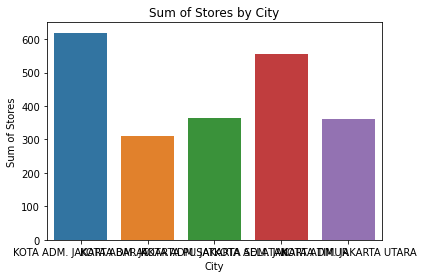

In [102]:
# create the bar chart using seaborn
sns.barplot(x='kota', y='count of distinct pharmacy', data=pharmacy_data_group)

# add title and labels to the chart
plt.title('Sum of Stores by City')
plt.xlabel('City')
plt.ylabel('Sum of Stores')

# show the chart
plt.show()

Tahap 1: Stratum berdasarkan kota

In [103]:
average_order_size_store = average_order_size_store[['Location - Sold To City','Order/ Month']]

In [104]:
average_order_size_store

,Location - Sold To City,Order/ Month
0,KOTA JAKARTA BARAT,1.837227e+07
1,KOTA JAKARTA PUSAT,3.891776e+07
2,KOTA JAKARTA SELATAN,3.379688e+07
3,KOTA JAKARTA TIMUR,3.081153e+07
4,KOTA JAKARTA UTARA,1.972391e+07


In [105]:
average_order_size_store_all = average_order_size_store['Order/ Month'].mean()
average_order_size_store["Variance"] = (average_order_size_store["Order/ Month"]-average_order_size_store_all)**2

In [106]:
average_order_size_store

,Location - Sold To City,Order/ Month,Variance
0,KOTA JAKARTA BARAT,1.837227e+07,9.904621e+13
1,KOTA JAKARTA PUSAT,3.891776e+07,1.122177e+14
2,KOTA JAKARTA SELATAN,3.379688e+07,2.994723e+13
3,KOTA JAKARTA TIMUR,3.081153e+07,6.185487e+12
4,KOTA JAKARTA UTARA,1.972391e+07,7.396966e+13


In [107]:
# Mencari nilai dari sigma_b^2 dan  sigma_w^2
sigma_b = (1/(N-1))*(average_order_size_store["Variance"].sum())
sigma_w = (1/(N))*(average_order_size_store["Variance"].sum())
print("Nilai dai sigma_b^2 adalah", sigma_b)
print("Nilai dai sigma_w^2 adalah", sigma_w)

Nilai dai sigma_b^2 adalah 80341580658555.08
Nilai dai sigma_w^2 adalah 64273264526844.06


In [108]:
# Mencari nilai dari m_opt
m_opt = math.sqrt(c1*sigma_w/(c2*(sigma_b-(sigma_w/M))))
print("Nilai dai m_opt adalah", round(m_opt,3))

Nilai dai m_opt adalah 0.898


In [109]:
# Digunakan beberapa asumsi untuk pehitungan
c0 = 6_500_000
c1 = 150_000
c2 = 150_000
N = 5
n_ = 5
M = 100
nm = 100

In [110]:
# Menghitung nilai dari C
C = c0 + c1*n_+c2*nm
print("Nilai dai C adalah Rp.",C)

Nilai dai C adalah Rp. 22250000


In [111]:
# Menghitung nilai n
n = (C-c0)/(c1+c2*m_opt)
n = math.ceil(n)
print("Total dari sample adalah", n)

Total dari sample adalah 56


In [112]:
pharmacy_data_group["Total Sample"] = round(pharmacy_data_group['% of total pharmacy']*n/100,0)

In [113]:
pharmacy_data_group

,kota,count of distinct pharmacy,% of total pharmacy,Total Sample
0,KOTA ADM. JAKARTA BARAT,619,28.034420,16.0
1,KOTA ADM. JAKARTA PUSAT,309,13.994565,8.0
2,KOTA ADM. JAKARTA SELATAN,365,16.530797,9.0
3,KOTA ADM. JAKARTA TIMUR,554,25.090580,14.0
4,KOTA ADM. JAKARTA UTARA,361,16.349638,9.0


Tahap 2 : Cluster sampling pada tahap 1 di masing-masing strata (Kecamatan)

In [114]:
pharmacy_data_group_sample = pharmacy_data_group[['kota','Total Sample']]
pharmacy_data_group_sample

,kota,Total Sample
0,KOTA ADM. JAKARTA BARAT,16.0
1,KOTA ADM. JAKARTA PUSAT,8.0
2,KOTA ADM. JAKARTA SELATAN,9.0
3,KOTA ADM. JAKARTA TIMUR,14.0
4,KOTA ADM. JAKARTA UTARA,9.0


In [115]:
strata_kecamatan_jakarta

,Kota,Jumlah Kecamatan
0,Jakarta Selatan,10
1,Jakarta Timur,10
2,Jakarta Pusat,8
3,Jakarta Barat,8
4,Jakarta Utara,6


In [116]:
#Menghitung nilai M masing-masing kota
kecamatan_jb = strata_kecamatan_jakarta.iloc[3][1]
kecamatan_jp = strata_kecamatan_jakarta.iloc[2][1]
kecamatan_js = strata_kecamatan_jakarta.iloc[0][1]
kecamatan_jt = strata_kecamatan_jakarta.iloc[1][1]
kecamatan_ju = strata_kecamatan_jakarta.iloc[4][1]
kecamatan_kec = [kecamatan_jb, kecamatan_jp, kecamatan_js, kecamatan_jt, kecamatan_ju]
kecamatan_kec

[8, 8, 10, 10, 6]

In [117]:
#Menghitung nilai N masing-masing kota
pharmacy_data_group_sample["total Kecamatan"] = kecamatan_kec
pharmacy_data_group_sample

<ipython-input-117-dc62f92eb081>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pharmacy_data_group_sample["total Kecamatan"] = kecamatan_kec


,kota,Total Sample,total Kecamatan
0,KOTA ADM. JAKARTA BARAT,16.0,8
1,KOTA ADM. JAKARTA PUSAT,8.0,8
2,KOTA ADM. JAKARTA SELATAN,9.0,10
3,KOTA ADM. JAKARTA TIMUR,14.0,10
4,KOTA ADM. JAKARTA UTARA,9.0,6


In [118]:
#Asumsi nilai dari B
B = (pharmacy_data_group["count of distinct pharmacy"].sum())
B

2208

In [119]:
average_order_size_store['y'] = average_order_size_store['Order/ Month']*pharmacy_data_group_sample['total Kecamatan']
average_order_size_store

,Location - Sold To City,Order/ Month,Variance,y
0,KOTA JAKARTA BARAT,1.837227e+07,9.904621e+13,1.469782e+08
1,KOTA JAKARTA PUSAT,3.891776e+07,1.122177e+14,3.113421e+08
2,KOTA JAKARTA SELATAN,3.379688e+07,2.994723e+13,3.379688e+08
3,KOTA JAKARTA TIMUR,3.081153e+07,6.185487e+12,3.081153e+08
4,KOTA JAKARTA UTARA,1.972391e+07,7.396966e+13,1.183435e+08


In [120]:
average_order_size_store['miu x m'] = average_order_size_store_all*pharmacy_data_group_sample['total Kecamatan']
average_order_size_store

,Location - Sold To City,Order/ Month,Variance,y,miu x m
0,KOTA JAKARTA BARAT,1.837227e+07,9.904621e+13,1.469782e+08,2.265958e+08
1,KOTA JAKARTA PUSAT,3.891776e+07,1.122177e+14,3.113421e+08,2.265958e+08
2,KOTA JAKARTA SELATAN,3.379688e+07,2.994723e+13,3.379688e+08,2.832447e+08
3,KOTA JAKARTA TIMUR,3.081153e+07,6.185487e+12,3.081153e+08,2.832447e+08
4,KOTA JAKARTA UTARA,1.972391e+07,7.396966e+13,1.183435e+08,1.699468e+08


In [121]:
average_order_size_store["(y-miu x m)^2"] = average_order_size_store["y"] - average_order_size_store["miu x m"]
average_order_size_store["(y-miu x m)^2"] = average_order_size_store["(y-miu x m)^2"]**2
average_order_size_store

,Location - Sold To City,Order/ Month,Variance,y,miu x m,(y-miu x m)^2
0,KOTA JAKARTA BARAT,1.837227e+07,9.904621e+13,1.469782e+08,2.265958e+08,6.338957e+15
1,KOTA JAKARTA PUSAT,3.891776e+07,1.122177e+14,3.113421e+08,2.265958e+08,7.181936e+15
2,KOTA JAKARTA SELATAN,3.379688e+07,2.994723e+13,3.379688e+08,2.832447e+08,2.994723e+15
3,KOTA JAKARTA TIMUR,3.081153e+07,6.185487e+12,3.081153e+08,2.832447e+08,6.185487e+14
4,KOTA JAKARTA UTARA,1.972391e+07,7.396966e+13,1.183435e+08,1.699468e+08,2.662908e+15


In [122]:
average_order_size_store["sigma c"] = average_order_size_store["(y-miu x m)^2"]/(pharmacy_data_group_sample['total Kecamatan']-1)
average_order_size_store

,Location - Sold To City,Order/ Month,Variance,y,miu x m,(y-miu x m)^2,sigma c
0,KOTA JAKARTA BARAT,1.837227e+07,9.904621e+13,1.469782e+08,2.265958e+08,6.338957e+15,9.055653e+14
1,KOTA JAKARTA PUSAT,3.891776e+07,1.122177e+14,3.113421e+08,2.265958e+08,7.181936e+15,1.025991e+15
2,KOTA JAKARTA SELATAN,3.379688e+07,2.994723e+13,3.379688e+08,2.832447e+08,2.994723e+15,3.327470e+14
3,KOTA JAKARTA TIMUR,3.081153e+07,6.185487e+12,3.081153e+08,2.832447e+08,6.185487e+14,6.872763e+13
4,KOTA JAKARTA UTARA,1.972391e+07,7.396966e+13,1.183435e+08,1.699468e+08,2.662908e+15,5.325815e+14


In [123]:
average_order_size_store["D"] = B**2/(4*pharmacy_data_group_sample['total Kecamatan']**2)
average_order_size_store

,Location - Sold To City,Order/ Month,Variance,y,miu x m,(y-miu x m)^2,sigma c,D
0,KOTA JAKARTA BARAT,1.837227e+07,9.904621e+13,1.469782e+08,2.265958e+08,6.338957e+15,9.055653e+14,19044.00
1,KOTA JAKARTA PUSAT,3.891776e+07,1.122177e+14,3.113421e+08,2.265958e+08,7.181936e+15,1.025991e+15,19044.00
2,KOTA JAKARTA SELATAN,3.379688e+07,2.994723e+13,3.379688e+08,2.832447e+08,2.994723e+15,3.327470e+14,12188.16
3,KOTA JAKARTA TIMUR,3.081153e+07,6.185487e+12,3.081153e+08,2.832447e+08,6.185487e+14,6.872763e+13,12188.16
4,KOTA JAKARTA UTARA,1.972391e+07,7.396966e+13,1.183435e+08,1.699468e+08,2.662908e+15,5.325815e+14,33856.00


In [124]:
average_order_size_store["n"] = round((pharmacy_data_group_sample['total Kecamatan']*average_order_size_store["sigma c"])/(pharmacy_data_group_sample['total Kecamatan']*average_order_size_store["D"]+average_order_size_store["sigma c"]))
average_order_size_store

,Location - Sold To City,Order/ Month,Variance,y,miu x m,(y-miu x m)^2,sigma c,D,n
0,KOTA JAKARTA BARAT,1.837227e+07,9.904621e+13,1.469782e+08,2.265958e+08,6.338957e+15,9.055653e+14,19044.00,8.0
1,KOTA JAKARTA PUSAT,3.891776e+07,1.122177e+14,3.113421e+08,2.265958e+08,7.181936e+15,1.025991e+15,19044.00,8.0
2,KOTA JAKARTA SELATAN,3.379688e+07,2.994723e+13,3.379688e+08,2.832447e+08,2.994723e+15,3.327470e+14,12188.16,10.0
3,KOTA JAKARTA TIMUR,3.081153e+07,6.185487e+12,3.081153e+08,2.832447e+08,6.185487e+14,6.872763e+13,12188.16,10.0
4,KOTA JAKARTA UTARA,1.972391e+07,7.396966e+13,1.183435e+08,1.699468e+08,2.662908e+15,5.325815e+14,33856.00,6.0


Tahap 3 : Pengambilan sample dengan SRS

In [128]:
pharmacy_data_group_sample["Total Kecamatan Sample"] = average_order_size_store['n']
pharmacy_data_group_sample_final = pharmacy_data_group_sample[['kota','Total Sample','Total Kecamatan Sample']]
pharmacy_data_group_sample_final

,kota,Total Sample,Total Kecamatan Sample
0,KOTA ADM. JAKARTA BARAT,16.0,8.0
1,KOTA ADM. JAKARTA PUSAT,8.0,8.0
2,KOTA ADM. JAKARTA SELATAN,9.0,10.0
3,KOTA ADM. JAKARTA TIMUR,14.0,10.0
4,KOTA ADM. JAKARTA UTARA,9.0,6.0
